# Compare Models

In [ ]:
import os
import sys
import json
import re
os.chdir('../') if os.getcwd().endswith('/notebooks') else os.chdir('./')
sys.path.append(os.getcwd())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from typing import List, Optional
from utils.fontlib import set_font_family
set_font_family()

METRIC = 'accuracy'

In [ ]:
def read_history(model_names: List[str], metric: str, root_dir: str) -> pd.DataFrame:
    history = dict()
    metric = f'eval_{metric}'

    for model_name in model_names:
        output_dir = os.path.join(root_dir, model_name)
        checkpoints = [ckp for ckp in os.listdir(output_dir) if re.match('checkpoint-[0-9]+', ckp)]
        recent_checkpoint = sorted(checkpoints, key=lambda x: int(x.split('-')[1]))[-1]
        trainer_state = os.path.join(output_dir, recent_checkpoint,'trainer_state.json')

        with open(trainer_state) as f:
            log_history = json.load(f)['log_history']

        history[model_name] = {'epoch'+str(int(log['epoch'])):round(log[metric],5) for log in log_history if log.get(metric)}

    return pd.DataFrame(history)

In [ ]:
def plot_history(history: pd.DataFrame, metric: str, title: Optional[str]=None,
                ymin: Optional[float]=0., ymax: Optional[float]=1.) -> Axes:

    accuracy = history.values.reshape(-1).tolist()
    epoch = np.array([[e]*len(history.columns) for e in history.index]).reshape(-1).tolist()
    model = history.columns.tolist()*len(history)

    history = pd.DataFrame({metric:accuracy, 'epoch':epoch, 'model':model})
    ax = sns.barplot(data=history, x='model', y=metric, hue='epoch')

    if title:
        ax.set_title(title, fontsize=16)

    if ymin > 0. or ymax < 1.:
        ax.set_ylim(ymin=ymin, ymax=ymax)

    return ax

## Compare Models by Name

In [ ]:
compare_list = ['koelectra_jaehyeong','koelectra_v3','koelectra_ner','roberta_large']
history = read_history(compare_list, METRIC, root_dir='./saved/models')
history

,koelectra_jaehyeong,koelectra_v3,koelectra_ner,roberta_large
epoch1,0.6868,0.6680,0.6648,0.6816
epoch2,0.6904,0.6812,0.6756,0.7128


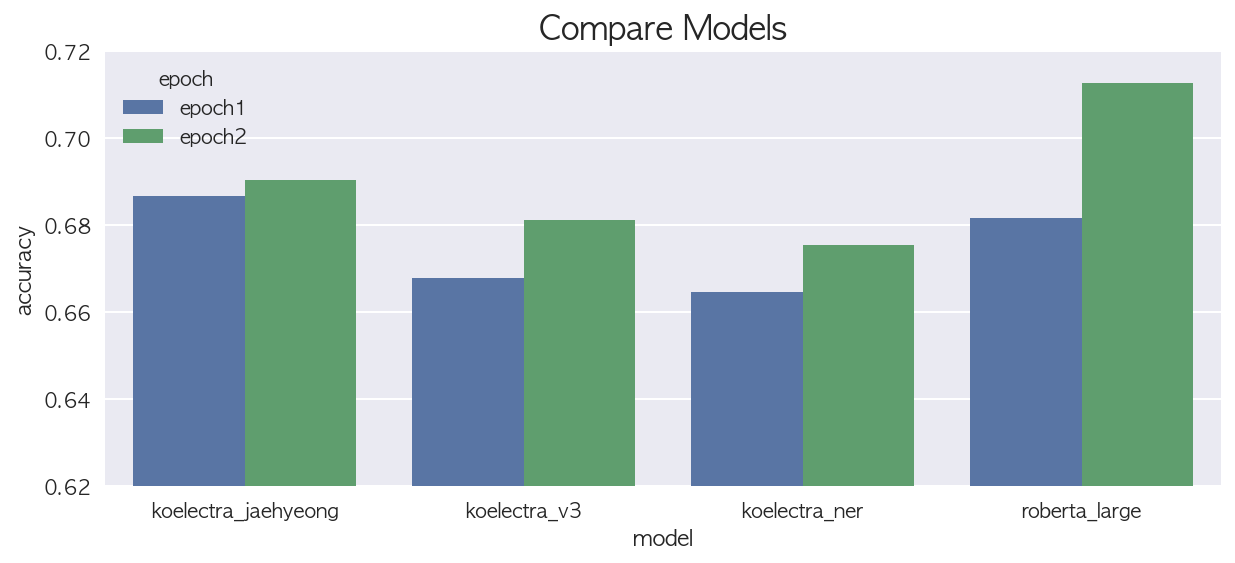

In [ ]:
fig = plt.figure(figsize=(10,4))
plot_history(history, METRIC, title='Compare Models', ymin=0.62, ymax=0.72)
plt.show()

## Compare Models by Data

In [ ]:
compare_list = ['koelectra_vanila','koelectra_aug','koelectra_cleaned']
history = read_history(compare_list, METRIC, root_dir='./saved/models')
history

,koelectra_vanila,koelectra_aug,koelectra_cleaned
epoch1,0.6836,0.70293,0.67142
epoch2,0.6980,0.70893,0.68417


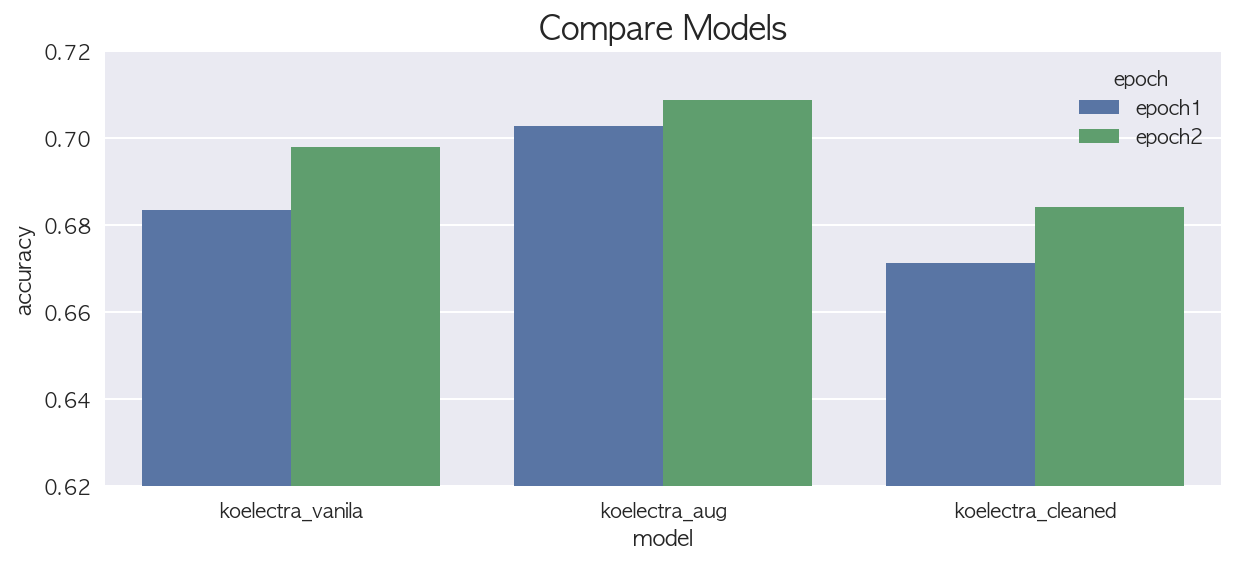

In [ ]:
fig = plt.figure(figsize=(10,4))
plot_history(history, METRIC, title='Compare Models', ymin=0.62, ymax=0.72)
plt.show()